# Блок №5 Проект

На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

+ В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
+ Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

# Задания:
1. Выберите метод, который предположительно подойдет в первом вопросе.
2. Проверьте, являются ли дисперсии внутри групп гомогенными.
3. Проведите тест на нормальность распределения.
4. Сравните средние в представленных группах.
5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
6. Примите решение: какие картинки в итоге будем использовать?
7. Выберите метод для второго теста.
8. Визуализируйте распределение events для контрольной и тестовой групп. 
9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. \
10 - 11.Выберите формулу для модели, проведите тест.

# Описание данных

[5_task_1](https://disk.yandex.ru/d/Lj5WClBbCt3fyw):

+ id – id клиента в эксперименте
+ group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
+ events – сколько блюд суммарно было заказано за период

[5_task_2](https://disk.yandex.ru/d/Vnlvg9uOrMVKhw):

+ id – id клиента в эксперименте
+ segment – сегмент (high/low)
+ group – вид кнопки (control – старая версия, test – новая версия)
+ events – сколько блюд суммарно было заказано за период

In [3]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Критерий Тьюки
from statsmodels.stats.anova import anova_lm # для многофакторного диспресионного анализа

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(16, 6)}, style='whitegrid')

# Задание 1
___
Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

+ A – прямоугольные 16:9
+ B – квадратные
+ C – прямоугольные 12:4

Каким статистическим тестом нужно воспользоваться для сравнения средних в данном случае?

Ответ: ANOWA

# Задание 2
___
Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [4]:
# Считаем данные
task_1 = pd.read_csv('/home/jupyter-a.stamati-16/Statistic/5_task_1.csv')
task_2 = pd.read_csv('/home/jupyter-a.stamati-16/Statistic/5_task_2.csv')

In [37]:
# Посмотрим на данные в первом тесте
task_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [8]:
# H0 в тесте Левина - что дисперсии гомогенны. Соответственно, альтернативная гипотеза - дисперсии гетерогенны (различаются).

In [9]:
# Выбираем три отдельные группы для сравнения
a = task_1.query('group == "A"').events
b = task_1.query('group == "B"').events
c = task_1.query('group == "C"').events

In [12]:
# Проводим тест Левина
stat, p = ss.levene(a, b, c)

In [13]:
# Посмотрим на значение p-value
p

0.1041327199523974

Искомое значение p-value, p > 0,05, не отклоняем нулевую гипотезу

# Задание 3
___
Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр `random_state=17` в методе `sample`.

Дополнительно: попробуйте посчитать тест Шапиро-Уилка без использования метода `sample`. Сравните  результат с `normaltest`, а также qq-графиками. Какой вывод можно сделать по совокупности этих методов?

Выберите верные утверждения:
+ Все утверждения не верны
+ Распределение events в группе B является нормальным
+ Распределение events в группе A является нормальным
+ Распределение events в группе С является нормальным

In [18]:
# Отберем семлпы для теста
sample_a = a.sample(1000, random_state=17)
sample_b = b.sample(1000, random_state=17)
sample_c = c.sample(1000, random_state=17)

# sample_a_task_1 = task_1[task_1['group'] == 'A']['events'].sample(1000, random_state=17)
# sample_b_task_1 = task_1[task_1['group'] == 'B']['events'].sample(1000, random_state=17)
# sample_c_task_1 = task_1[task_1['group'] == 'C']['events'].sample(1000, random_state=17)

**Проверяем выборки на нормальность по тесту Шапиро-Уилка**

H0 в Шапиро-Уилка тесте - что распределение нормальное

In [19]:
stats, p = ss.shapiro(sample_a)
p

0.09609563648700714

Нормальное распределение, так как pvalue > 0.05

In [20]:
stats, p = ss.shapiro(sample_b)
p

0.31768906116485596

Нормальное распределение, так как pvalue > 0.05

In [21]:
stats, p = ss.shapiro(sample_c)
p

0.3359004259109497

Нормальное распределение, так как pvalue > 0.05

# Задание 4
___
Самое время провести тест! 

Заполните пропуски:

Провести олнофакторный дисперсионный анализ и записать результаты
Для сравнения средних я использую  ВЫБРАТЬ. Значение статистики равно (окр. до целого) ВЫБРАТЬ, а р-уровень значимости составил ВЫБРАТЬ.

In [25]:
# Проведем однофакторный дисперсионный анализ
f_stats, p = ss.f_oneway(a, b, c)

In [26]:
round(f_stats, 0)

2886.0

In [27]:
p

0.0

p-value много меньше 0, отклоняем H0

Ответ: 

Для сравнения средних я использую ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (F_ONEWAY). Значение статистики равно (окр. до целого) 
2886, а р-уровень значимости составил 0.

# Задание 5
___
Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. Дают ли они те же выводы, что и Тьюки?

In [41]:
# print(pairwise_tukeyhsd(столбец_с_данными, столбец_с_обозначениями_групп))

In [33]:
# Используем критерий Тьюки
print(pairwise_tukeyhsd(task_1['events'], groups=task_1['group']).summary())

# Итерпретация колонок в тесте
# group1 и group2 - названия групп, которые сравниваются в рамках теста
# meandiff - разница между значением 2 группы и значением 1 группы (Столбец **meandiff** отражает различие в средних между **второй и первой группой, именно в таком порядке.**)
# p-adj - скорректированный порог значимости
# lower и upper - нижняя и верхняя границы доверительного интервала различий в средних
# reject - отвергается нулевая гипотеза или нет

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Статистически значимы различия есть между всеми группами

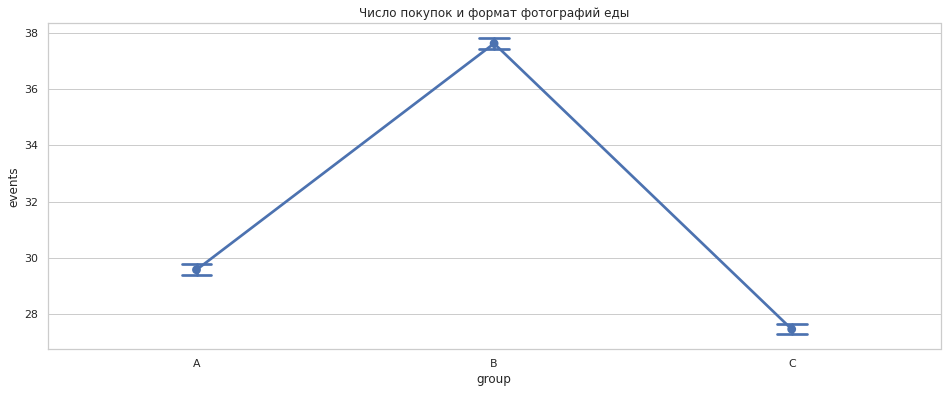

In [36]:
sns.pointplot(x='group', y='events', data=task_1, capsize = .1)
plt.title('Число покупок и формат фотографий еды');

In [32]:
# Еще один способ рассчитать критерий Тьюки
# MultiComp = MultiComparison(task_1['events'], task_1['group'])
# print(MultiComp.tukeyhsd().summary())

# Задание 6
___
Так какие картинки в итоге будем использовать?

Ответ: B – Квадратные

# Задание 7
___
Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Какой метод скорее всего пригодится в данном случае?

Ответ: многофакторный дисперсионный анализ

In [38]:
# Посмотрим на данные во втором тесте
task_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


# Задание 8
___
Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:

A) ![](https://ucarecdn.com/08b06a66-16b4-4d31-a773-59b3fdfdedfa/)
B) ![](https://ucarecdn.com/e7a6ac56-fcda-40ec-9af1-4333c7881b3c/)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


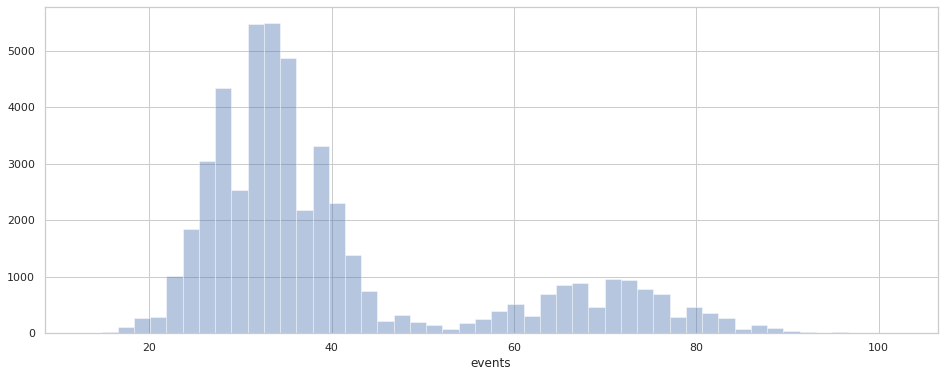

In [40]:
sns.distplot(task_2[task_2['group'] == 'test']['events'], kde=False);

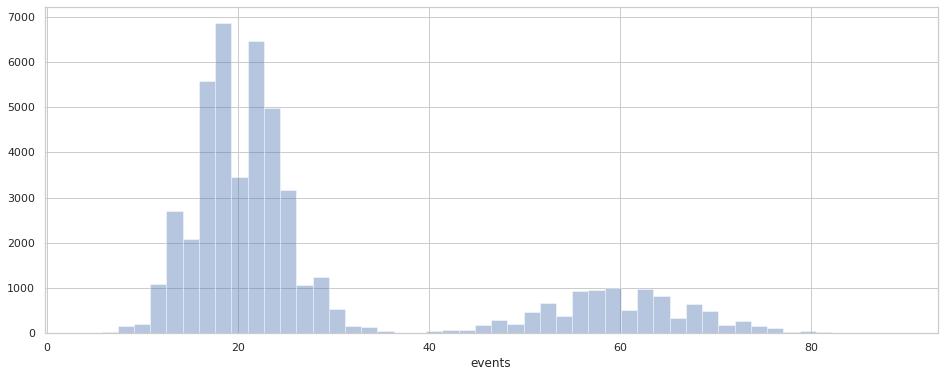

In [41]:
sns.distplot(task_2[task_2['group'] == 'control']['events'], kde=False)

Ответ:
+ A -> Контрольная группа
+ B -> Тестовая группа

# Задание 9
___
Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [44]:
task_2 \
    .groupby(['group', 'segment']) \
    .events \
    .describe() \
    .T \
    .round(2)

group     control                test          
segment      high       low      high       low
count    10000.00  40000.00  10000.00  40000.00
mean        59.97     20.03     69.94     33.03
std          7.81      4.47      8.40      5.72
min         31.00      4.00     40.00     13.00
25%         55.00     17.00     64.00     29.00
50%         60.00     20.00     70.00     33.00
75%         65.00     23.00     76.00     37.00
max         89.00     41.00    102.00     59.00

Ответ: 7.81

# Задание 10
___
Почти у цели – осталось выбрать формулу для модели. Напомним, что мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов.

Если вы прибегнете к statsmodels, то какую формулу используете?

Ответ: events ~ segment + group + segment:group

# Задание 11
___
Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

| group | segment | combination |
|-------|---------|-------------|
| test  | high    | test / high |
| test  | high    | test / high |

Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения:
+ Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 36
+ Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой
+ Разница между control/high и test/high составила около 10
+ Для обоих сегментов показатели статистически значимо _уменьшились_ по сравнению с контрольной группой
+ Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
+ Различий совсем не оказалось :(

In [47]:
# Многофакторный дисперсионный анализ ANOVA
formula = 'events ~ segment + group + segment:group'
model = smf.ols(formula, task_2).fit()
aov_table = anova_lm(model, typ=2)
aov_table

# По рядам: первая НП, вторая НП, взаимодействие НП и остатки.
# По колонкам:
# sum_sq - сумма квадратов
# df - степени свободы
# F - F-значение
# PR (>F) - p-значение

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [66]:
task_2['combination'] = task_2['group'] + ' \ ' + task_2['segment']

In [67]:
task_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [69]:
# Рассщитаем критерий Тьюки
MultiComp = MultiComparison(task_2['events'], task_2['combination'])
print(MultiComp.tukeyhsd().summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


Верные ответы:
- Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
- Разница между control/high и test/high составила около 10
- Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой

# Задание 12
___
Визуализируйте результаты теста и заполните пропуски:

Фактор group оказался  ВЫБРАТЬ, фактор segment – ВЫБРАТЬ, их взаимодействие – ВЫБРАТЬ. Судя по графику, для всех групп среднее значение events ВЫБРАТЬ, поэтому решение: ВЫБРАТЬ.    

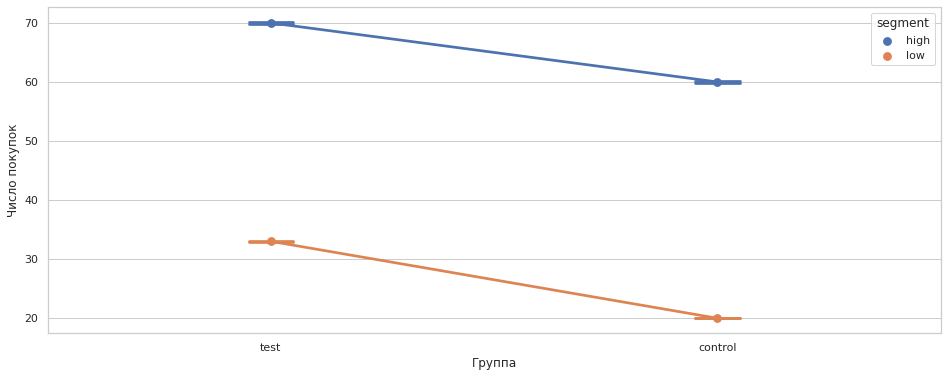

In [50]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = task_2, capsize = .1)

plt.xlabel('Группа')
plt.ylabel('Число покупок')
plt.show()

Ответ на задание:
Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО. Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ